# IMT 575 C - Group Project - TradeX

## Module: Reddit_TradeX_Sentiment.py Ver.01

### Durga Prasad Tavva

#### 05/06/2022

#### Part 1. Import Libraries and initiate the local variables

In [17]:
#from psaw import PushshiftAPI
#import reddit_scraper_module as rd
#redAPI = PushshiftAPI()

import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings

filename = 'Reddit_Data.csv'

stocks = ['$FB','$AMZN','$AAPL','$NFLX','$GOOG']
subreddits = ['wallstreetbets','RobinHood','Stocks','investing','StockMarket']

### Part 2. Read the data from Reddit_Data.CSV

In [18]:
df_main = pd.read_csv(filename)
df_main["Time"] = pd.to_datetime(df_main["Date"],format='%m/%d/%Y %H')
df_main["Date"] = pd.to_datetime(df_main["Time"].dt.strftime('%m/%d/%Y'))
df_main.head()

,Date,Comment,Tags,Subreddit,Time
0,2022-05-04,$fb calls,$FB,wallstreetbets,2022-05-04 19:00:00
1,2022-05-04,$fb,$FB,wallstreetbets,2022-05-04 19:00:00
2,2022-05-04,$fb?,$FB,wallstreetbets,2022-05-04 19:00:00
3,2022-05-04,Win porn! Thank you $AAPL,$AAPL,wallstreetbets,2022-05-04 13:00:00
4,2022-05-04,"So, I bought a sh*t load of $NFLX the day it w...",$NFLX,wallstreetbets,2022-05-04 07:00:00


#### 2.1 Exploratory Data Analysis on the Reddit submissions

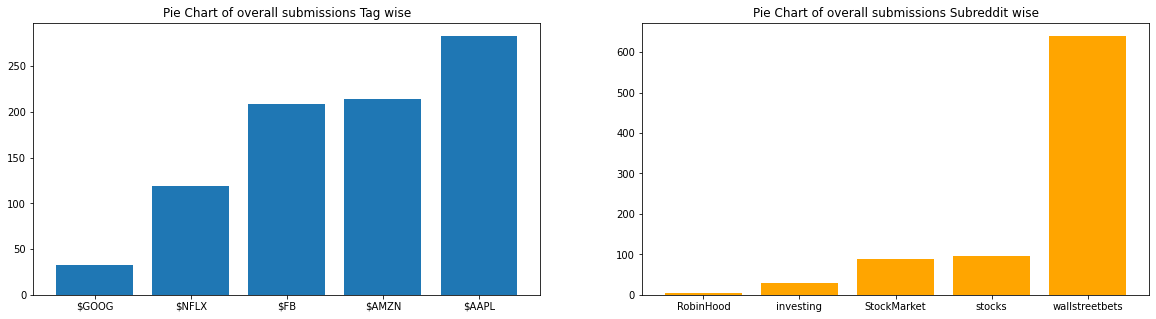

<Figure size 720x720 with 0 Axes>

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
#plt.title('Pie Chart of overall submissions Tag wise')
fig = plt.figure(figsize=(10,10))

dfgroup = df_main.groupby(['Tags'])['Comment'].count().reset_index().sort_values(by="Comment")
#dfgroup = dfgroup
ax1.set_title('Pie Chart of overall submissions Tag wise')
#ax1.pie(dfgroup["Comment"],labels=, autopct='%1.1f%%')
ax1.bar(dfgroup["Tags"],dfgroup["Comment"])

dfgroup = df_main.groupby(['Subreddit'])['Comment'].count().reset_index().sort_values(by="Comment")
ax2.set_title('Pie Chart of overall submissions Subreddit wise')
#ax2.pie(dfgroup["Comment"],labels=dfgroup["Subreddit"], autopct='%1.1f%%')
ax2.bar(dfgroup["Subreddit"],dfgroup["Comment"],color = 'orange')
plt.show()

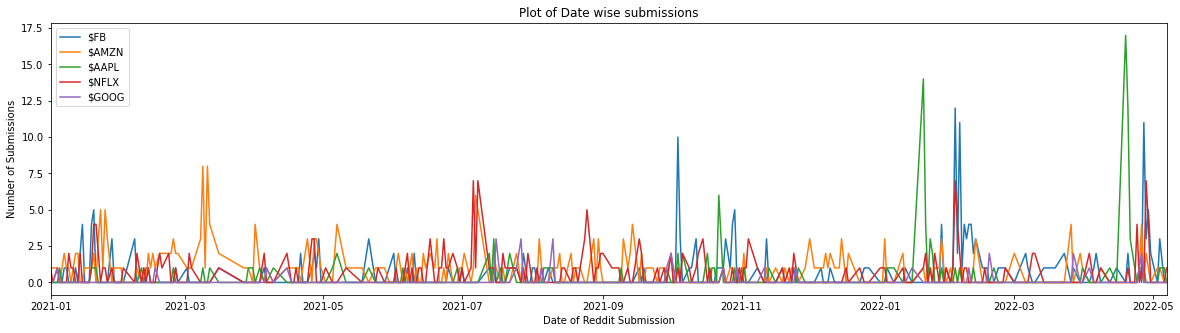

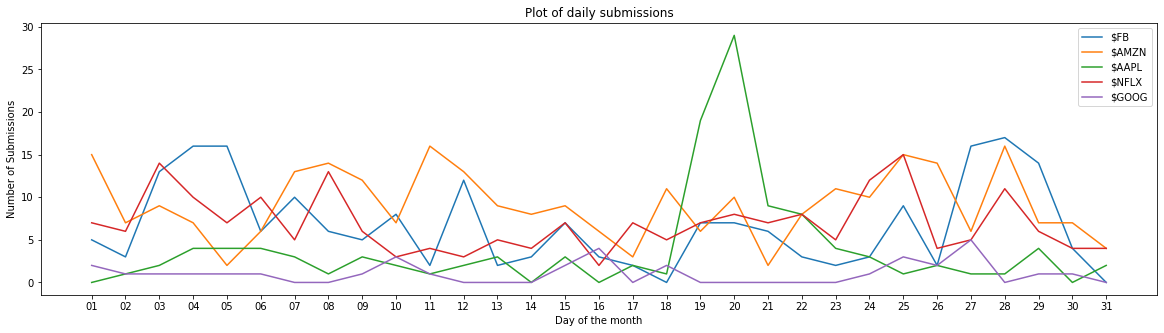

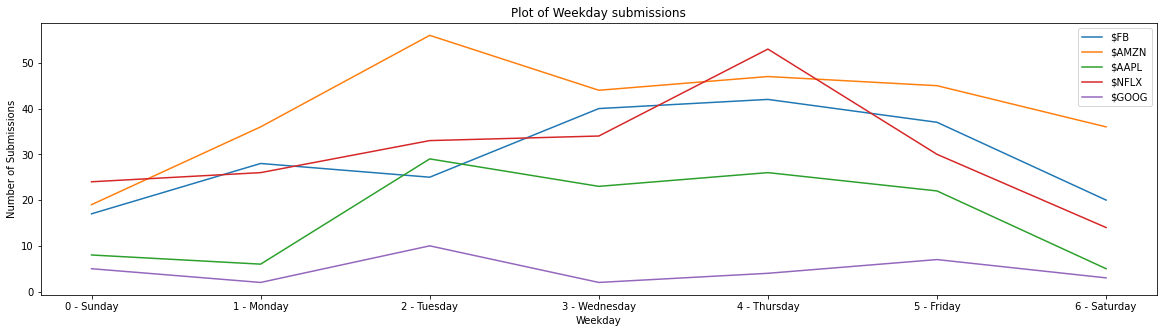

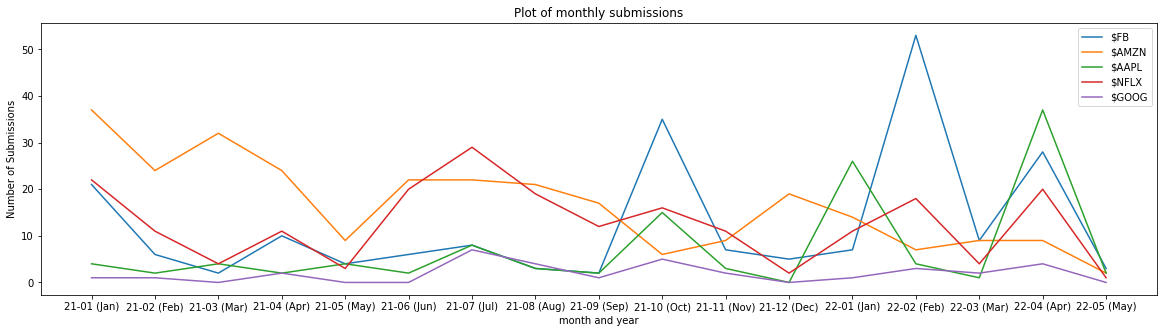

In [20]:
#Plot of Date wise submissions
dfgroup = df_main.groupby(['Date','Tags'])['Subreddit'].count().reset_index(name = 'Subreddit')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Date',columns='Tags',values='Subreddit')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.xlim(min(dfgroup["Date"]),max(dfgroup["Date"]))
plt.title('Plot of Date wise submissions')
plt.xlabel('Date of Reddit Submission')
plt.ylabel('Number of Submissions')
plt.plot(dfgroup["Date"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of daily submissions
df_main["DayOfMonth"] = df_main["Date"].dt.strftime('%d')
dfgroup = df_main.groupby(['DayOfMonth','Tags'])['Subreddit'].count().reset_index(name = 'Subreddit')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='DayOfMonth',columns='Tags',values='Subreddit')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of daily submissions')
plt.xlabel('Day of the month')
plt.ylabel('Number of Submissions')
plt.plot(dfgroup["DayOfMonth"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Weekday submissions
df_main["Day"] = df_main["Date"].dt.strftime('%w - %A')
dfgroup = df_main.groupby(['Day','Tags'])['Subreddit'].count().reset_index(name = 'Subreddit')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Day',columns='Tags',values='Subreddit')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of Weekday submissions')
plt.xlabel('Weekday')
plt.ylabel('Number of Submissions')
plt.plot(dfgroup["Day"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of monthly submissions
df_main["month"] = df_main["Date"].dt.strftime('%y-%m (%b)')
dfgroup = df_main.groupby(['month','Tags'])['Subreddit'].count().reset_index(name = 'Subreddit')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='month',columns='Tags',values='Subreddit')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of monthly submissions')
plt.xlabel('month and year')
plt.ylabel('Number of Submissions')
plt.plot(dfgroup["month"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

In [21]:
#Display table to show the additional derivate columns of date and time added to the dataset
df_main

,Date,Comment,Tags,Subreddit,Time,DayOfMonth,Day,month
0,2022-05-04,$fb calls,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May)
1,2022-05-04,$fb,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May)
2,2022-05-04,$fb?,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May)
3,2022-05-04,Win porn! Thank you $AAPL,$AAPL,wallstreetbets,2022-05-04 13:00:00,04,3 - Wednesday,22-05 (May)
4,2022-05-04,"So, I bought a sh*t load of $NFLX the day it w...",$NFLX,wallstreetbets,2022-05-04 07:00:00,04,3 - Wednesday,22-05 (May)
...,...,...,...,...,...,...,...,...
853,2021-02-02,$AMZN Amazing interview of Jeff Bezos before b...,$AMZN,StockMarket,2021-02-02 15:00:00,02,2 - Tuesday,21-02 (Feb)
854,2021-02-01,Does this mean $AAPL is going up?,$AAPL,StockMarket,2021-02-01 16:00:00,01,1 - Monday,21-02 (Feb)
855,2021-01-28,Name me a fundamentally cheaper stock than Fac...,$FB,StockMarket,2021-01-28 13:00:00,28,4 - Thursday,21-01 (Jan)
856,2021-01-12,$AAPL Tim Cook is making a big announcement to...,$AAPL,StockMarket,2021-01-12 20:00:00,12,2 - Tuesday,21-01 (Jan)


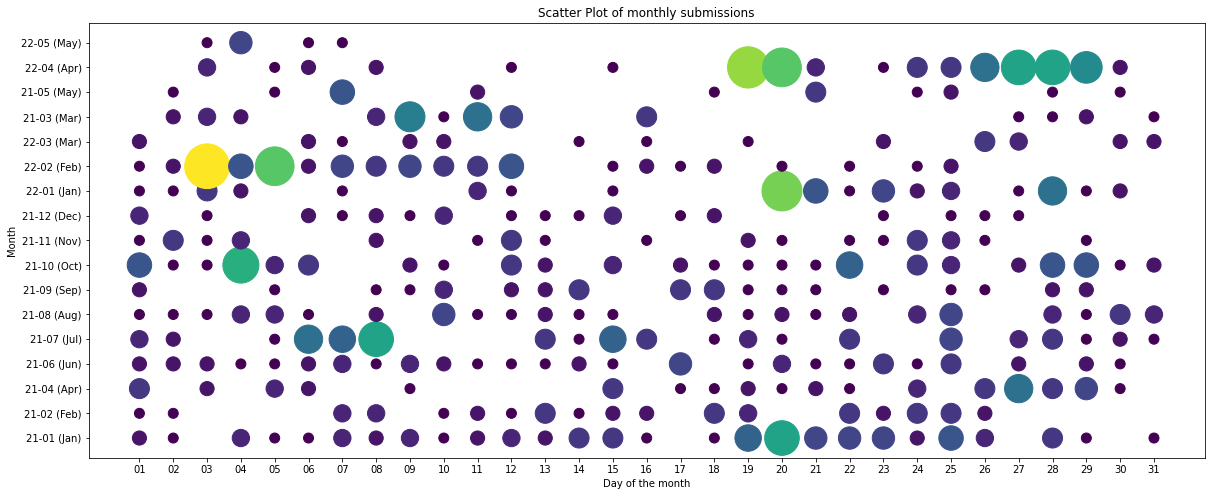

In [22]:
#Scatter plot of Monthly Submissions
dfgroup = df_main.groupby(['DayOfMonth','month'])['Subreddit'].count().reset_index(name = 'Subreddit')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of monthly submissions')
plt.xlabel('Day of the month')
plt.ylabel('Month')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["month"],s=dfgroup["Subreddit"]*100,c=dfgroup["Subreddit"])
plt.show()

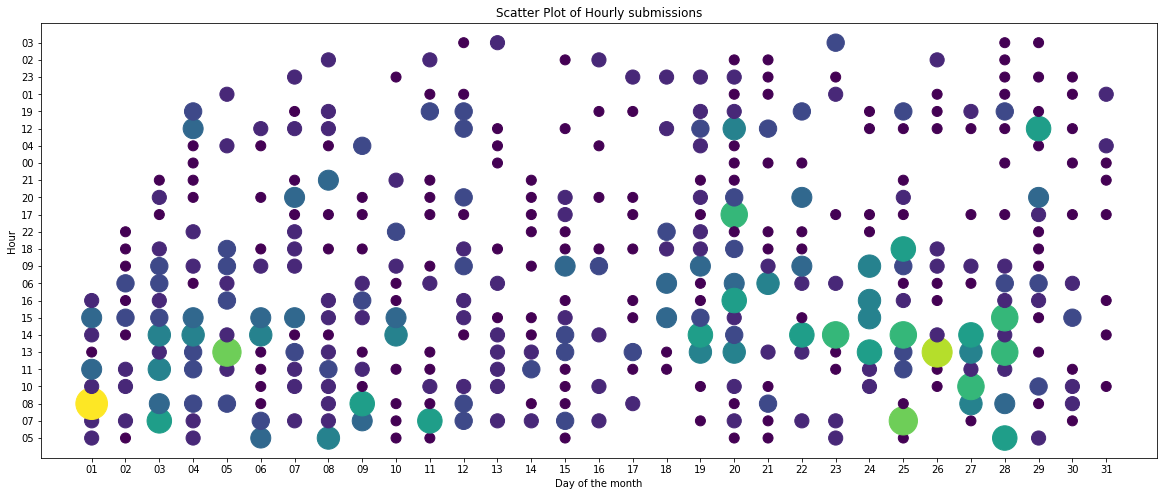

In [23]:
#Scatter Plot of Hourly Submissions
df_main["Hour"] = df_main["Time"].dt.strftime('%H')
dfgroup = df_main.groupby(['DayOfMonth','Hour'])['Subreddit'].count().reset_index(name = 'Subreddit')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of Hourly submissions')
plt.xlabel('Day of the month')
plt.ylabel('Hour')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["Hour"],s=dfgroup["Subreddit"]*100,c=dfgroup["Subreddit"])
plt.show()

### Part 3. Sentiment Analysis Function using Vader

In [24]:
# %load vader_working_file.py
"""[This module contains helper functions for generating the vader sentiment scores
    for the reddit api submissions.]

Returns:
    [DataFrame]: [A pandas DataFrame containing the dates and corresponding
     weighted sentiment scores.]
"""
#pylint: disable=wrong-import-position
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

VAR = 0.5

#df_working = pd.read_csv('Reddit_Test.csv')
sia = SentimentIntensityAnalyzer()
class VaderReddit():
    """[This class contains helper functions to compute sentiment scores for each reddit submission
        using VADER.]
    """
    def __init__(self) -> None:
        pass
    @staticmethod
    def add_vader_scores(df_rd):
        """[This function accepts a dataframe of reddit submissions
            and applies vader sentiment scores to the comments column.]

        Args:
            df_rd ([DataFrame]): [This is the dataframe of fetched and cleaned reddit submissions]
        """
        df_rd['Negative'] = df_rd['Comment'].apply(lambda x:sia.polarity_scores(str(x))['neg'])
        df_rd['Neutral'] = df_rd['Comment'].apply(lambda x:sia.polarity_scores(str(x))['neu'])
        df_rd['Positive'] = df_rd['Comment'].apply(lambda x:sia.polarity_scores(str(x))['pos'])
        df_rd['Compound'] = df_rd['Comment'].apply(lambda x:sia.polarity_scores(str(x))['compound'])

    @staticmethod
    def add_vader_weighted_sentiments(df_working):
        """[This function takes the dataframe with vader scores and adds weighted sentiment
            scores as columns]

        Args:
            df_working ([DataFrame]): [DataFrame with appended vader sentiment scores]
        """
        df_working['Weighted_Sentiment_Neg'] = df_working.apply(lambda row: (row['Negative']
                                                                             *row['Compound']
                                                                if row['Compound'] > 0 or
                                                                row['Compound'] < 0
                                                                else row['Negative'] *
                                                                VAR), axis=1)
        df_working['Weighted_Sentiment_Neu'] = df_working.apply(lambda row:(row['Neutral']
                                                                            *row['Compound']
                                                                if row['Compound'] > 0 or
                                                                row['Compound'] < 0
                                                                else row['Neutral'] *
                                                                VAR), axis=1)
        df_working['Weighted_Sentiment_Pos'] = df_working.apply(lambda row:(row['Positive']
                                                                             *row['Compound']
                                                                if row['Compound'] > 0 or
                                                                row['Compound'] < 0
                                                                else row['Positive'] *
                                                                VAR), axis=1)

        df_working['Sum_Weights'] = df_working.apply(lambda row:(row['Weighted_Sentiment_Neg'] +
                                                                row['Weighted_Sentiment_Neu'] +
                                                                row['Weighted_Sentiment_Pos']),
                                                            axis=1)

    @staticmethod
    def get_subset(stock_name, df_working_main):
        """[This function subsets the inputted dataframe based on the search query
        (ticker symbol) and returns the resulting subset dataframe]

        Args:
            stock_name ([String]): [Stock Ticker Symbol: $AMC]
            df_working_main ([DataFrame]): [DataFrame of reddit submissions,
                              sentiment scores, and weighted_sentiment_scores]

        Returns:
            [DataFrame]: [Resulting dataframe subset based on search query of stock name.]
        """
        if len(df_working_main) != 0:
            df_working_sub = df_working_main.loc[(df_working_main['Tags'] == stock_name)]
        return df_working_sub.sort_values(by='Date')

    @staticmethod
    def get_score(df_working_sub):
        """[This function groups the rows by date and aggregates the scores into sum and count.
            Creates another column 'Sentiment_Score' with sum of sentiment scores/count.]

        Args:
            df_working_sub ([DataFrame]): [Subset DataFrame based on search query]

        Returns:
            [DataFrame]: [DataFrame of Dates and Scores for each data for visualization.]
        """
        df_working_grp = df_working_sub.groupby('Date')['Sum_Weights'].aggregate(['sum','count'])
        df_working_grp['Sentiment_Score'] = df_working_grp.apply(lambda x: (x['sum'] /
                                                                        x['count']), axis=1)
        return pd.DataFrame(df_working_grp)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtavva\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 3.1 Sentiment Analysis of Reddit Data

**Vader gives us the positive, negative, compound and weighted sentiments**

In [25]:
import vader_working_file as vd
vd.VaderReddit.add_vader_scores(df_main)
vd.VaderReddit.add_vader_weighted_sentiments(df_main)
df_main.head()

,Date,Comment,Tags,Subreddit,Time,DayOfMonth,Day,month,Hour,Negative,Neutral,Positive,Compound,Weighted_Sentiment_Neg,Weighted_Sentiment_Neu,Weighted_Sentiment_Pos,Sum_Weights
0,2022-05-04,$fb calls,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May),19,0.000,1.000,0.000,0.0000,0.000000,0.500000,0.000000,0.5000
1,2022-05-04,$fb,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May),19,0.000,1.000,0.000,0.0000,0.000000,0.500000,0.000000,0.5000
2,2022-05-04,$fb?,$FB,wallstreetbets,2022-05-04 19:00:00,04,3 - Wednesday,22-05 (May),19,0.000,1.000,0.000,0.0000,0.000000,0.500000,0.000000,0.5000
3,2022-05-04,Win porn! Thank you $AAPL,$AAPL,wallstreetbets,2022-05-04 13:00:00,04,3 - Wednesday,22-05 (May),13,0.000,0.313,0.687,0.7644,0.000000,0.239257,0.525143,0.7644
4,2022-05-04,"So, I bought a sh*t load of $NFLX the day it w...",$NFLX,wallstreetbets,2022-05-04 07:00:00,04,3 - Wednesday,22-05 (May),07,0.098,0.902,0.000,-0.3612,-0.035398,-0.325802,-0.000000,-0.3612


In [26]:
#Display of the weights generated using Vader Sentiment Analysis
df_main.describe()

,Negative,Neutral,Positive,Compound,Weighted_Sentiment_Neg,Weighted_Sentiment_Neu,Weighted_Sentiment_Pos,Sum_Weights
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.048976,0.849478,0.101549,0.090369,-0.016955,0.306195,0.045884,0.335123
std,0.114816,0.185528,0.161726,0.333019,0.061720,0.293597,0.088797,0.359387
min,0.000000,0.208000,0.000000,-0.946200,-0.545875,-0.667724,-0.161582,-0.946200
25%,0.000000,0.733250,0.000000,0.000000,0.000000,0.225000,0.000000,0.340000
50%,0.000000,0.931500,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
75%,0.000000,1.000000,0.173750,0.340000,0.000000,0.500000,0.066941,0.500000
max,0.792000,1.000000,0.750000,0.916900,0.113500,0.722139,0.525143,0.916900


#### Exploratory analysis of Vader Sentiment for Reddit Data

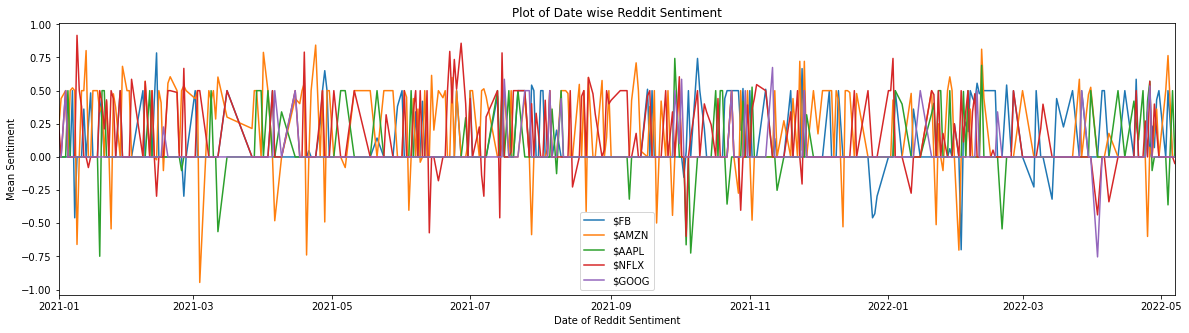

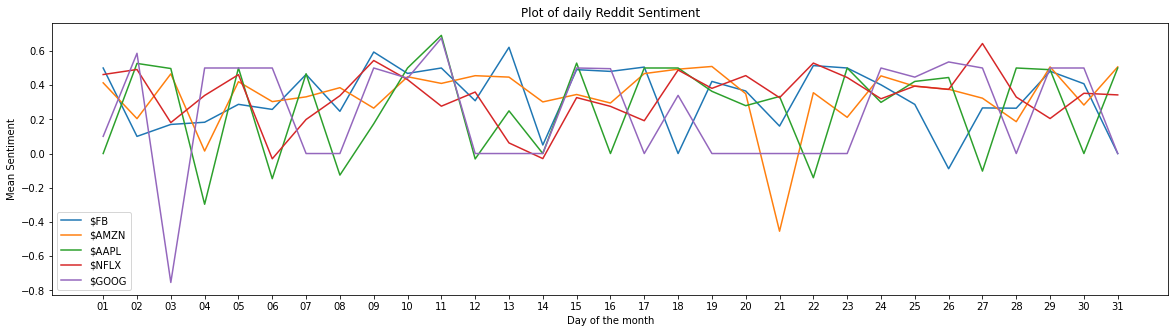

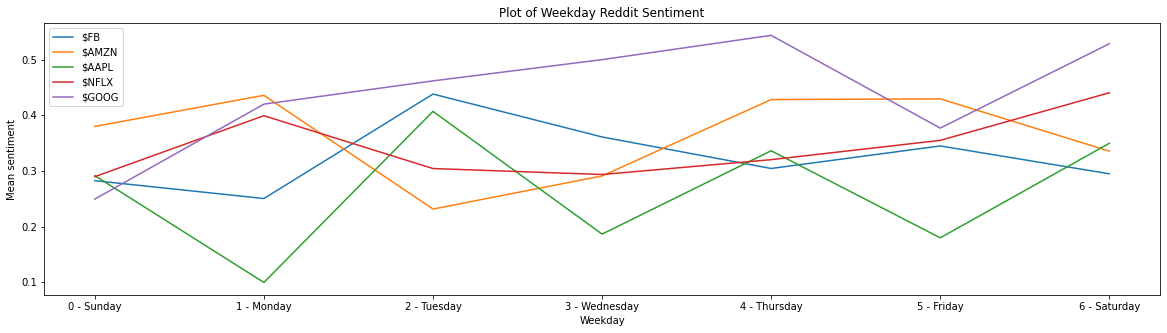

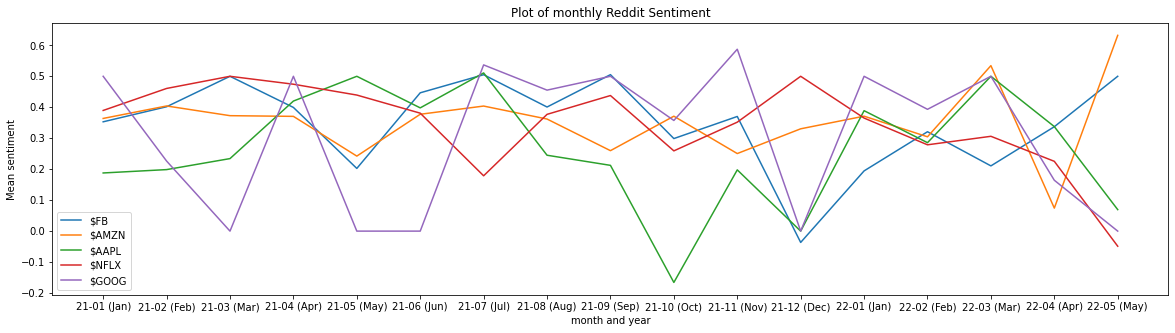

In [30]:
#Plot of Date wise Reddit Sentiment
dfgroup = df_main.groupby(['Date','Tags'])['Sum_Weights'].mean().reset_index(name = 'Sum_Weights')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Date',columns='Tags',values='Sum_Weights')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.xlim(min(dfgroup["Date"]),max(dfgroup["Date"]))
plt.title('Plot of Date wise Reddit Sentiment')
plt.xlabel('Date of Reddit Sentiment')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["Date"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of daily Reddit Sentiment
df_main["DayOfMonth"] = df_main["Date"].dt.strftime('%d')
dfgroup = df_main.groupby(['DayOfMonth','Tags'])['Sum_Weights'].mean().reset_index(name = 'Sum_Weights')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='DayOfMonth',columns='Tags',values='Sum_Weights')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of daily Reddit Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Mean Sentiment')
plt.plot(dfgroup["DayOfMonth"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of Weekday Reddit Sentiment
df_main["Day"] = df_main["Date"].dt.strftime('%w - %A')
dfgroup = df_main.groupby(['Day','Tags'])['Sum_Weights'].mean().reset_index(name = 'Sum_Weights')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='Day',columns='Tags',values='Sum_Weights')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of Weekday Reddit Sentiment')
plt.xlabel('Weekday')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["Day"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

#Plot of monthly Reddit Sentiment
df_main["month"] = df_main["Date"].dt.strftime('%y-%m (%b)')
dfgroup = df_main.groupby(['month','Tags'])['Sum_Weights'].mean().reset_index(name = 'Sum_Weights')
dfgroup = pd.DataFrame(dfgroup.pivot_table(index='month',columns='Tags',values='Sum_Weights')).reset_index().fillna(0)
fig = plt.figure(figsize=(20,5))
plt.title('Plot of monthly Reddit Sentiment')
plt.xlabel('month and year')
plt.ylabel('Mean sentiment')
plt.plot(dfgroup["month"],dfgroup[df_main["Tags"].unique()])
plt.legend(stocks)
plt.show()

C:\Users\dtavva\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


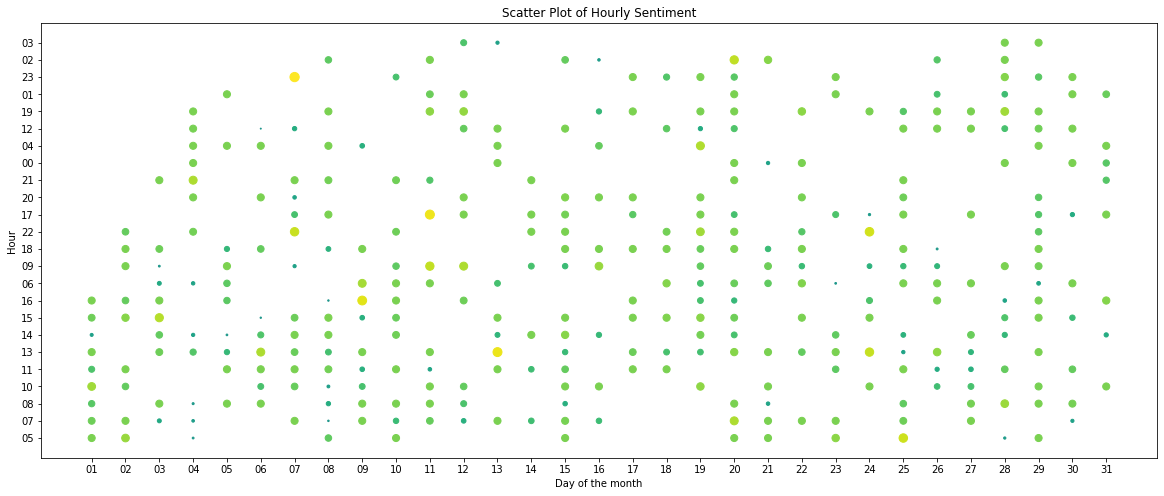

In [28]:
#Scatter Plot of Hourly Sentiment
df_main["Hour"] = df_main["Time"].dt.strftime('%H')
dfgroup = df_main.groupby(['DayOfMonth','Hour'])['Sum_Weights'].mean().reset_index(name = 'Sum_Weights')
fig = plt.figure(figsize=(20,8))
plt.title('Scatter Plot of Hourly Sentiment')
plt.xlabel('Day of the month')
plt.ylabel('Hour')
plt.scatter(dfgroup["DayOfMonth"],dfgroup["Hour"],s=dfgroup["Sum_Weights"]*100,c=dfgroup["Sum_Weights"])
plt.show()

In [29]:
#Write data to text file so that it will be used for portfolio allocation
df_main[["Date","Time","Tags","Sum_Weights"]].to_csv("Reddit_Vader_Sentiment.csv",header=True,index=False)